# load dataset

In [ ]:

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  # Then you can open the uploaded file using the filename `fn`
  with open(fn, 'rb') as f:
    # Do something with the file
    !unzip {fn}
    pass


Saving Q1 Dataset.zip to Q1 Dataset.zip
User uploaded file "Q1 Dataset.zip" with length 12845103 bytes


In [ ]:
# Step 1: Import necessary libraries
import zipfile
import os

# Step 2: Unzip the uploaded file
zip_path = 'Q1 Dataset.zip'
extract_to = '/content'  # This is the default directory in Colab

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Step 3: List the extracted files (optional, for verification)
extracted_files = os.listdir(extract_to)
print("Extracted files:", extracted_files)


Extracted files: ['.config', '.ipynb_checkpoints', 'Q1 Dataset.zip', 'Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset', 'sample_data']


## Display the first few images from each category (optional, for verification)

Files in MCI folder: ['ADNI_002_S_0729_MR_Axial_T2-Star__br_raw_20130819102720896_1_S198151_I385950.jpg', 'ADNI_137_S_1414_MR_AX_T2_STAR_br_raw_20130828140855023_16_S199523_I387885.jpg', 'ADNI_068_S_0802_MR_AXIAL_T2_STAR__br_raw_20150514153450710_17_S259816_I492617.jpg', 'ADNI_002_S_1155_MR_Axial_T2-Star__br_raw_20140109162303346_35_S209924_I404366.jpg', 'ADNI_013_S_1186_MR_AXIAL_T2__STAR_br_raw_20140219104653996_18_S212887_I414762.jpg', 'ADNI_037_S_0566_MR_AXIAL_T2_STAR__br_raw_20130806083716305_17_S197302_I384387.jpg', 'ADNI_137_S_0800_MR_AX_T2_STAR_br_raw_20130909082214119_4_S199666_I388103.jpg', 'ADNI_073_S_0746_MR_AXIAL_T2_STAR__br_raw_20140203165906348_38_S211785_I412470.jpg', 'ADNI_137_S_0994_MR_AX_T2_STAR_br_raw_20131203102503824_28_S206931_I399831.jpg', 'ADNI_137_S_0800_MR_AX_T2_STAR_br_raw_20130909082154166_13_S199666_I388103.jpg', 'ADNI_141_S_0915_MR_AXIAL_T2_STAR__br_raw_20131218095737905_10_S208389_I401999.jpg', 'ADNI_068_S_0802_MR_AXIAL_T2_STAR__br_raw_20150514153452317_2

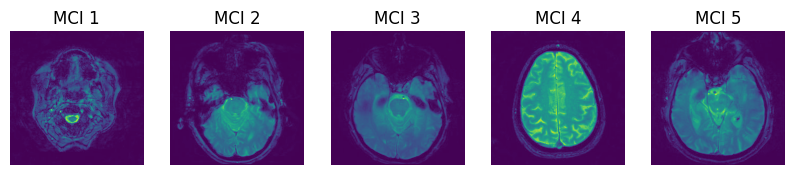

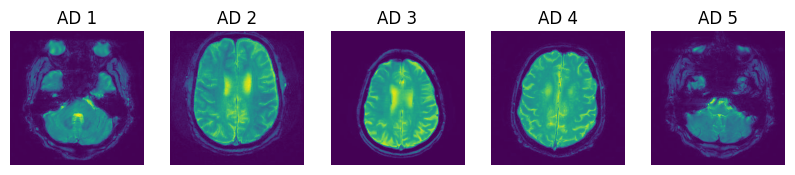

In [ ]:
# Step 1: Import necessary libraries
import os
from PIL import Image
import numpy as np

# Step 2: Define the path to the dataset folder and subdirectories
dataset_folder = os.path.join('/content', 'Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset')
mci_folder = os.path.join(dataset_folder, 'MCI')
ad_folder = os.path.join(dataset_folder, 'AD')

# Step 3: List the files in the MCI and AD folders (for verification)
mci_files = os.listdir(mci_folder)
ad_files = os.listdir(ad_folder)
print("Files in MCI folder:", mci_files)
print("Files in AD folder:", ad_files)

# Step 4: Load the images from the MCI folder
mci_images = []
for file_name in mci_files:
    if file_name.endswith('.jpg'):
        file_path = os.path.join(mci_folder, file_name)
        img = Image.open(file_path)
        mci_images.append(np.array(img))

# Step 5: Load the images from the AD folder
ad_images = []
for file_name in ad_files:
    if file_name.endswith('.jpg'):
        file_path = os.path.join(ad_folder, file_name)
        img = Image.open(file_path)
        ad_images.append(np.array(img))

# Step 6: Display the first few images from each category (optional, for verification)
from matplotlib import pyplot as plt

def display_images(images, title):
    plt.figure(figsize=(10, 10))
    for i, img in enumerate(images[:5]):  # Display the first 5 images
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.title(f'{title} {i+1}')
        plt.axis('off')
    plt.show()

display_images(mci_images, 'MCI')
display_images(ad_images, 'AD')

## load data

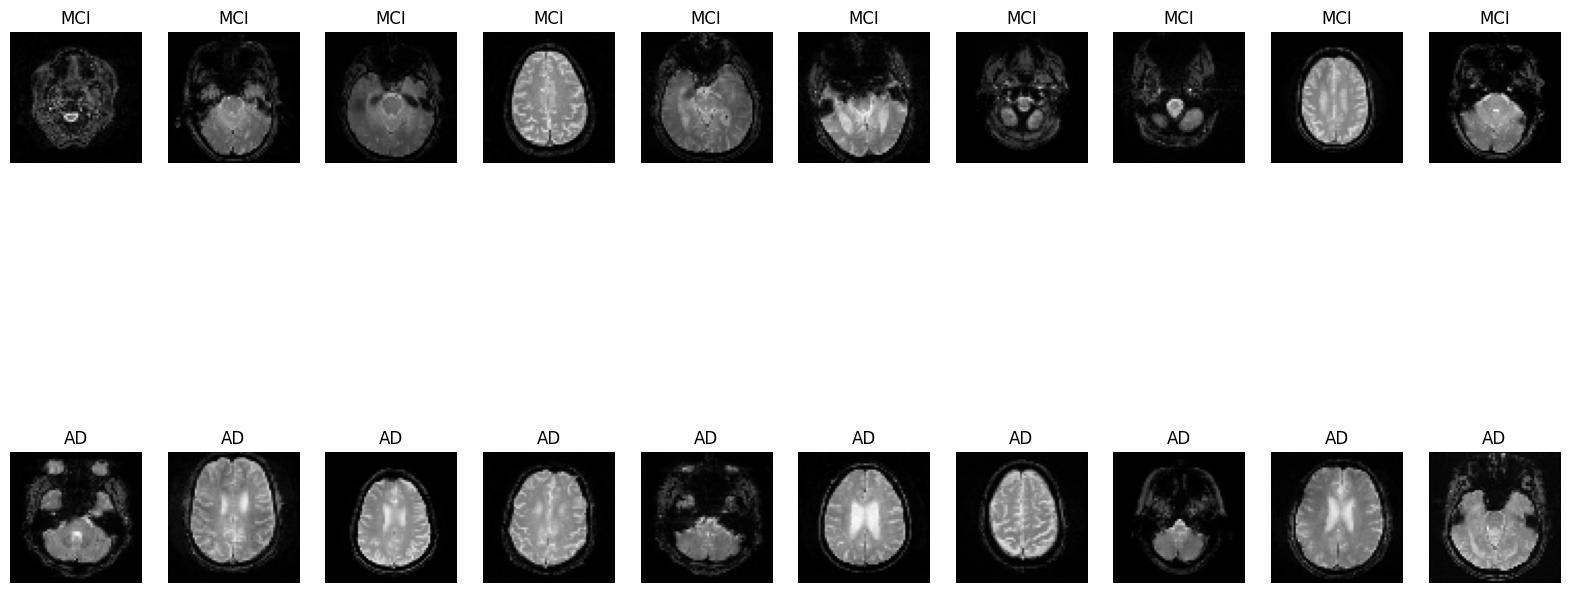

In [ ]:
# Step 1: Import necessary libraries
import os
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

# Step 2: Define the function to load data
def load_data(data_dir, target_size=(64, 64)):
    images, labels = [], []
    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        if os.path.isdir(label_dir):  # Ensure it's a directory
            for image_file in os.listdir(label_dir):
                if image_file.endswith('.jpg'):  # Ensure it's a JPEG file
                    image_path = os.path.join(label_dir, image_file)
                    image = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
                    image = tf.keras.preprocessing.image.img_to_array(image)
                    images.append(image)
                    labels.append(label)
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Step 3: Define the path to the dataset folder
data_dir = os.path.join('/content', 'Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset')

# Step 4: Load the data
images, labels = load_data(data_dir)

# Step 5: Convert labels to one-hot encoding
labels = np.where(labels == 'AD', 1, 0)
one_hot = np.zeros((labels.shape[0], 2))
one_hot[np.arange(labels.shape[0]), labels] = 1
labels = one_hot

# Step 6: Display 10 images from each category
def display_images_with_labels(images, labels, num_images=10):
    mci_indices = np.where(labels[:, 0] == 1)[0]
    ad_indices = np.where(labels[:, 1] == 1)[0]

    plt.figure(figsize=(20, 10))

    # Display MCI images
    for i, idx in enumerate(mci_indices[:num_images]):
        plt.subplot(2, num_images, i + 1)
        plt.imshow(images[idx].astype('uint8'))
        plt.title('MCI')
        plt.axis('off')

    # Display AD images
    for i, idx in enumerate(ad_indices[:num_images]):
        plt.subplot(2, num_images, num_images + i + 1)
        plt.imshow(images[idx].astype('uint8'))
        plt.title('AD')
        plt.axis('off')

    plt.show()

display_images_with_labels(images, labels)

## load and preprocess image


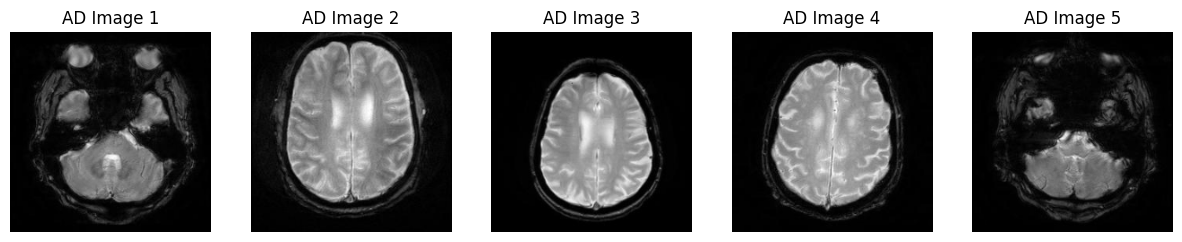

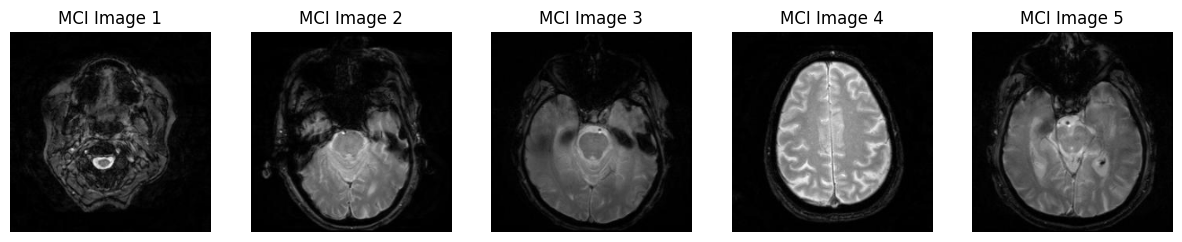

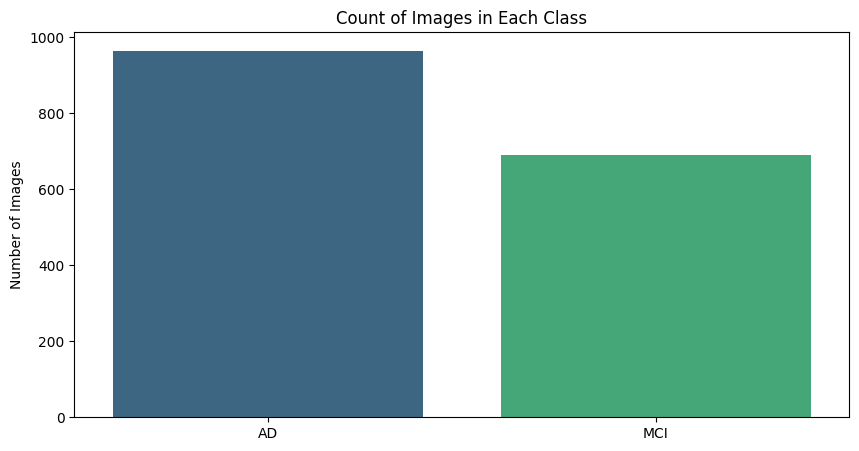

AD images count: 965
MCI images count: 689
Classes are correct and contain images.


In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to the directories containing the AD and MCI images
ad_path = '/content/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/AD'
mci_path = '/content/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/MCI'

# Function to get the list of image file paths in a directory
def get_image_paths(directory):
    return [os.path.join(directory, image) for image in os.listdir(directory)]

# Get the list of image file paths for AD and MCI images
ad_images = get_image_paths(ad_path)
mci_images = get_image_paths(mci_path)

# Define the image size for resizing
img_size = 224

# Function to load and preprocess image
def load_and_preprocess_image(image_path, grayscale=False):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE if grayscale else cv2.IMREAD_COLOR)
    if img is None:
        print(f"Error loading image: {image_path}")
        return None
    if not grayscale:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert image to RGB format
    img = cv2.resize(img, (img_size, img_size))  # Resize the image to a specified size
    img = img.astype('float32') / 255.0  # Normalize the pixel values to the range [0, 1]
    return img

# Function to display images
def display_images(image_paths, title, grayscale=False):
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(image_paths[:5]):
        img = load_and_preprocess_image(img_path, grayscale)
        if img is not None:
            plt.subplot(1, 5, i + 1)
            if grayscale:
                plt.imshow(img, cmap='gray')
            else:
                plt.imshow(img)
            plt.title(f"{title} Image {i + 1}")
            plt.axis('off')
    plt.show()

# Display some AD images
display_images(ad_images, "AD", grayscale=True)

# Display some MCI images
display_images(mci_images, "MCI", grayscale=True)

# Draw count plot of each class
ad_count = len(ad_images)
mci_count = len(mci_images)
plt.figure(figsize=(10, 5))
sns.barplot(x=['AD', 'MCI'], y=[ad_count, mci_count], hue=['AD', 'MCI'], palette='viridis')
plt.title('Count of Images in Each Class')
plt.ylabel('Number of Images')
plt.show()

# Check if classes are correct
def check_classes(ad_images, mci_images):
    ad_count = len(ad_images)
    mci_count = len(mci_images)
    print(f"AD images count: {ad_count}")
    print(f"MCI images count: {mci_count}")
    if ad_count > 0 and mci_count > 0:
        print("Classes are correct and contain images.")
    else:
        print("One or both classes are missing images.")

check_classes(ad_images, mci_images)

##  **main preprocess**

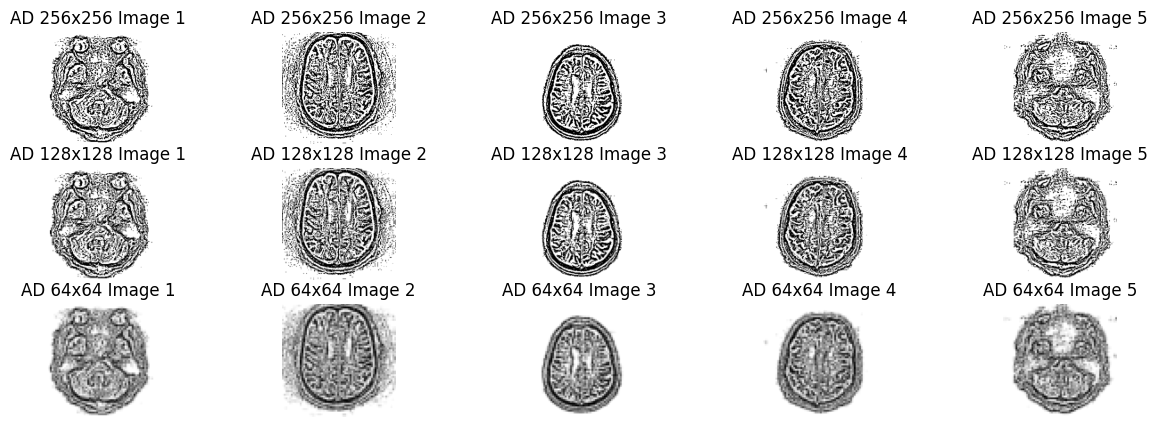

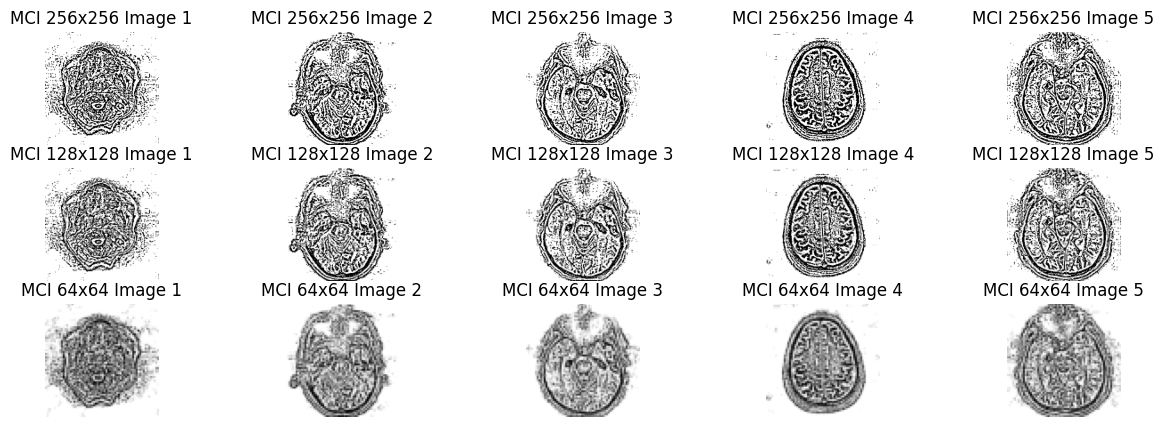

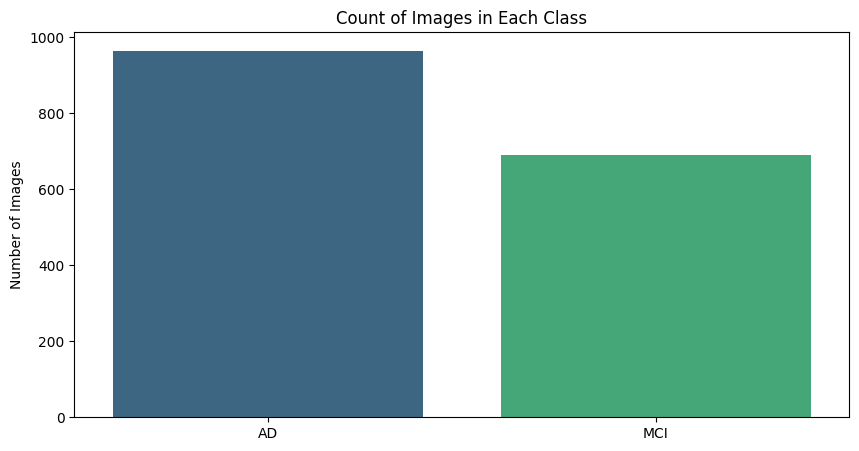

AD images count: 965
MCI images count: 689
Classes are correct and contain images.


In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.transform import resize

# Paths to the directories containing the AD and MCI images
ad_path = '/content/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/AD'
mci_path = '/content/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/MCI'

# Function to get the list of image file paths in a directory
def get_image_paths(directory):
    return [os.path.join(directory, image) for image in os.listdir(directory)]

# Get the list of image file paths for AD and MCI images
ad_images = get_image_paths(ad_path)
mci_images = get_image_paths(mci_path)

# Define the image size for resizing
img_size_256 = (256, 256)
img_size_128 = (128, 128)
img_size_64 = (64, 64)

# Function to load, preprocess, and transform image
def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
    if img is None:
        print(f"Error loading image: {image_path}")
        return None

    # Adaptive thresholding
    img_thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # Crop and filter (for simplicity, we'll just resize to 256x256)
    img_resized = cv2.resize(img_thresh, img_size_256)

    # Resizing using skimage transformer
    img_128 = resize(img_resized, img_size_128, anti_aliasing=True)
    img_64 = resize(img_resized, img_size_64, anti_aliasing=True)

    return img_resized, img_128, img_64

# Function to display images
def display_images(image_paths, title):
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(image_paths[:5]):
        img_256, img_128, img_64 = load_and_preprocess_image(img_path)
        if img_256 is not None:
            plt.subplot(3, 5, i + 1)
            plt.imshow(img_256, cmap='gray')
            plt.title(f"{title} 256x256 Image {i + 1}")
            plt.axis('off')

            plt.subplot(3, 5, i + 6)
            plt.imshow(img_128, cmap='gray')
            plt.title(f"{title} 128x128 Image {i + 1}")
            plt.axis('off')

            plt.subplot(3, 5, i + 11)
            plt.imshow(img_64, cmap='gray')
            plt.title(f"{title} 64x64 Image {i + 1}")
            plt.axis('off')
    plt.show()

# Display some AD images
display_images(ad_images, "AD")

# Display some MCI images
display_images(mci_images, "MCI")

# Draw count plot of each class
ad_count = len(ad_images)
mci_count = len(mci_images)
plt.figure(figsize=(10, 5))
sns.barplot(x=['AD', 'MCI'], y=[ad_count, mci_count],hue=['AD', 'MCI'], palette='viridis')
plt.title('Count of Images in Each Class')
plt.ylabel('Number of Images')
plt.show()

# Check if classes are correct
def check_classes(ad_images, mci_images):
    ad_count = len(ad_images)
    mci_count = len(mci_images)
    print(f"AD images count: {ad_count}")
    print(f"MCI images count: {mci_count}")
    if ad_count > 0 and mci_count > 0:
        print("Classes are correct and contain images.")
    else:
        print("One or both classes are missing images.")

check_classes(ad_images, mci_images)

# split dataset

In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

# Paths to the directories containing the AD and MCI images
ad_path = '/content/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/AD'
mci_path = '/content/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/MCI'

# Function to get the list of image file paths in a directory
def get_image_paths(directory):
    return [os.path.join(directory, image) for image in os.listdir(directory)]

# Get the list of image file paths for AD and MCI images
ad_images = get_image_paths(ad_path)
mci_images = get_image_paths(mci_path)

# Combine the image paths and labels
all_images = ad_images + mci_images
all_labels = [0] * len(ad_images) + [1] * len(mci_images)

# Split the dataset into training, validation, and test sets
train_images, test_images, train_labels, test_labels = train_test_split(
    all_images, all_labels, test_size=0.2, random_state=42, stratify=all_labels
)

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.25, random_state=42, stratify=train_labels
)

# Print the sizes of the resulting sets
print(f"Training set: {len(train_images)} images")
print(f"Validation set: {len(val_images)} images")
print(f"Test set: {len(test_images)} images")

Training set: 992 images
Validation set: 331 images
Test set: 331 images


## bar plot

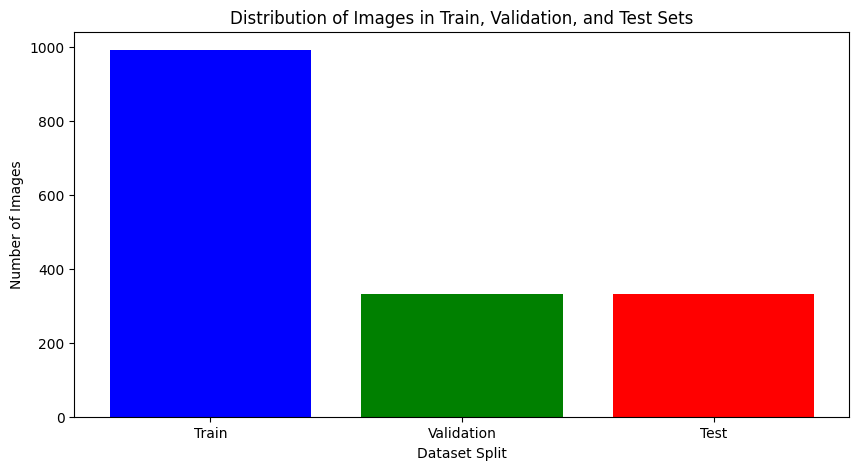

In [ ]:
# Count the number of images in each set
train_count = len(train_images)
val_count = len(val_images)
test_count = len(test_images)

# Draw bar plot
labels = ['Train', 'Validation', 'Test']
counts = [train_count, val_count, test_count]

plt.figure(figsize=(10, 5))
plt.bar(labels, counts, color=['blue', 'green', 'red'])
plt.title('Distribution of Images in Train, Validation, and Test Sets')
plt.xlabel('Dataset Split')
plt.ylabel('Number of Images')
plt.show()

# data agumentation

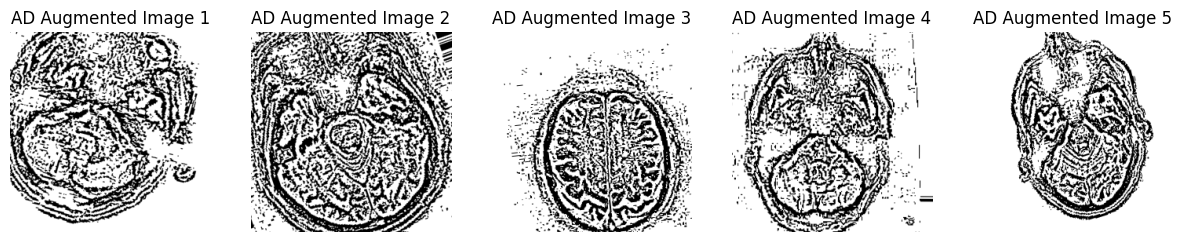

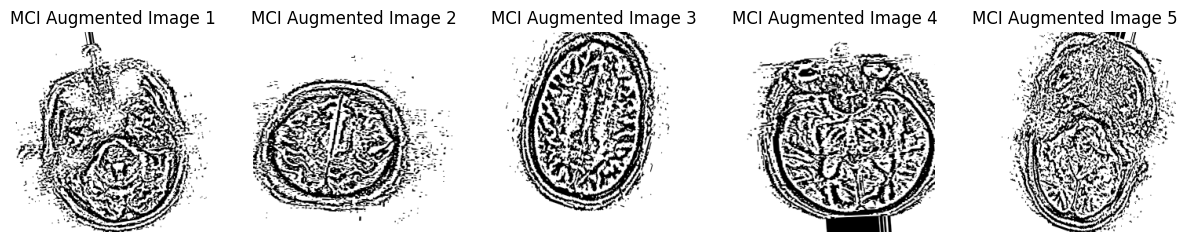

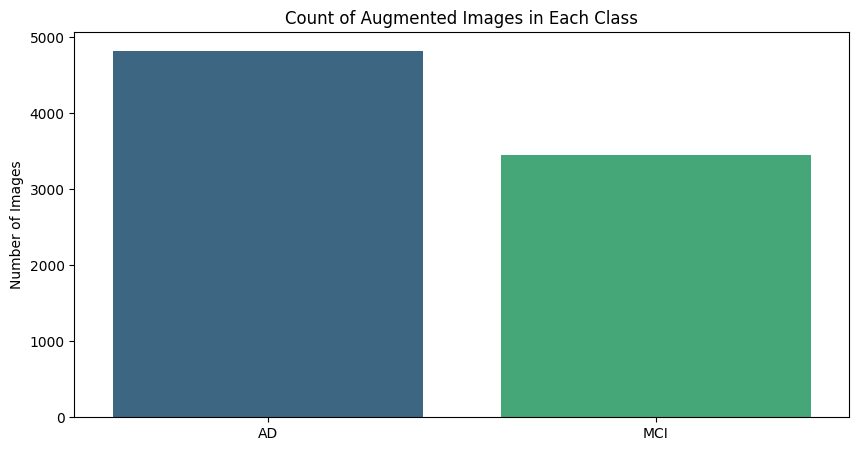

AD images count: 4825
MCI images count: 3445
Classes are correct and contain images.


In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from multiprocessing import Pool, cpu_count
from PIL import Image

# Paths to the directories containing the AD and MCI images
ad_save_path = '/content/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/Augmented_AD'
mci_save_path = '/content/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/Augmented_MCI'

# Create directories to save augmented images if they don't exist
os.makedirs(ad_save_path, exist_ok=True)
os.makedirs(mci_save_path, exist_ok=True)


# Define the image size for resizing
img_size_256 = (256, 256)

# Function to load, preprocess, and transform image
def load_and_preprocess_image(image_path):
    try:
        img = Image.open(image_path).convert('L')  # Load as grayscale
        img = np.array(img)

        # Adaptive thresholding
        img_thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

        # Resize to 256x256
        img_resized = cv2.resize(img_thresh, img_size_256)

        return img_resized
    except Exception as e:
        print(f"Error loading image: {image_path}, error: {e}")
        return None

# Data augmentation
datagen = ImageDataGenerator(
    horizontal_flip=True,
    shear_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rotation_range=20,
    zoom_range=0.2
)

# Function to augment and save images in batches
def augment_and_save_images(image_paths, save_dir, total_augmentations, batch_size=32):
    count = 0
    images_needed = total_augmentations * len(image_paths)
    while count < images_needed:
        for image_path in image_paths:
            img = load_and_preprocess_image(image_path)
            if img is not None:
                img = np.expand_dims(img, axis=-1)  # Add channel dimension
                img = np.expand_dims(img, axis=0)   # Add batch dimension
                aug_iter = datagen.flow(img, batch_size=1)
                for _ in range(total_augmentations):
                    aug_img = aug_iter.next()[0].astype('uint8')
                    save_path = os.path.join(save_dir, f"augmented_{count}.png")
                    cv2.imwrite(save_path, aug_img[:, :, 0])
                    count += 1
                    if count >= images_needed:
                        break
            if count >= images_needed:
                break

# Desired number of augmentations (total images should be 5 times the original images)
total_augmentations = 5

# Augment and save AD and MCI images
augment_and_save_images(ad_images, ad_save_path, total_augmentations)
augment_and_save_images(mci_images, mci_save_path, total_augmentations)

# Display some augmented images
def display_augmented_images(image_paths, title, num_images=5):
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(image_paths[:num_images]):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"{title} Augmented Image {i + 1}")
        plt.axis('off')
    plt.show()

# Get augmented image paths for display
ad_augmented_images = get_image_paths(ad_save_path)
mci_augmented_images = get_image_paths(mci_save_path)
display_augmented_images(ad_augmented_images, "AD")
display_augmented_images(mci_augmented_images, "MCI")

# Draw count plot of each class
ad_count = len(ad_augmented_images)
mci_count = len(mci_augmented_images)
plt.figure(figsize=(10, 5))
sns.barplot(x=['AD', 'MCI'], y=[ad_count, mci_count],hue=['AD', 'MCI'], palette='viridis')
plt.title('Count of Augmented Images in Each Class')
plt.ylabel('Number of Images')
plt.show()

# Check if classes are correct
def check_classes(ad_images, mci_images):
    ad_count = len(ad_images)
    mci_count = len(mci_images)
    print(f"AD images count: {ad_count}")
    print(f"MCI images count: {mci_count}")
    if ad_count > 0 and mci_count > 0:
        print("Classes are correct and contain images.")
    else:
        print("One or both classes are missing images.")

check_classes(ad_augmented_images, mci_augmented_images)

In [ ]:
# Combine augmented image paths and labels
all_images = ad_augmented_images + mci_augmented_images
all_labels = [0] * len(ad_augmented_images) + [1] * len(mci_augmented_images)

# Split the dataset into training, validation, and test sets
train_images, test_images, train_labels, test_labels = train_test_split(
    all_images, all_labels, test_size=0.2, random_state=42, stratify=all_labels
)

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.25, random_state=42, stratify=train_labels
)

# Print the sizes of the resulting sets
print(f"Training set: {len(train_images)} images")
print(f"Validation set: {len(val_images)} images")
print(f"Test set: {len(test_images)} images")


Training set: 4962 images
Validation set: 1654 images
Test set: 1654 images


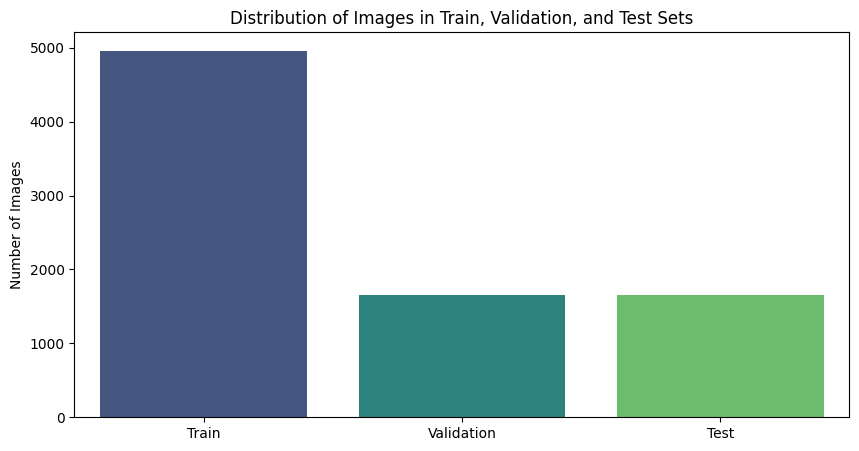

AD images count: 4825
MCI images count: 3445
Classes are correct and contain images.


In [ ]:
# Draw bar plot for train, test, validation sets
labels = ['Train', 'Validation', 'Test']
counts = [len(train_images), len(val_images), len(test_images)]

plt.figure(figsize=(10, 5))
sns.barplot(x=labels, y=counts,hue=labels, palette='viridis')
plt.title('Distribution of Images in Train, Validation, and Test Sets')
plt.ylabel('Number of Images')
plt.show()

# Check if classes are correct
def check_classes(ad_images, mci_images):
    ad_count = len(ad_images)
    mci_count = len(mci_images)
    print(f"AD images count: {ad_count}")
    print(f"MCI images count: {mci_count}")
    if ad_count > 0 and mci_count > 0:
        print("Classes are correct and contain images.")
    else:
        print("One or both classes are missing images.")

check_classes(ad_augmented_images, mci_augmented_images)

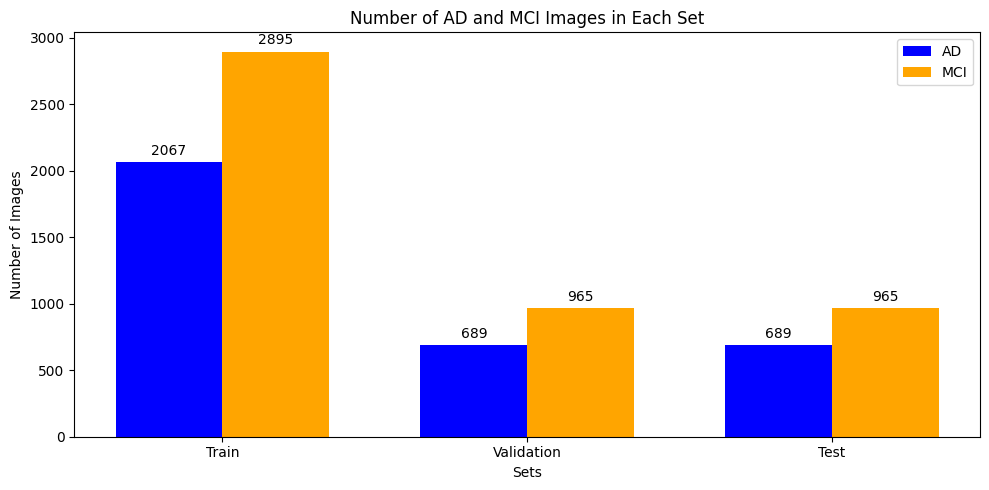

In [ ]:
# Count the number of AD and MCI images in each set
train_ad_count = sum(train_labels)
train_mci_count = len(train_labels) - train_ad_count

val_ad_count = sum(val_labels)
val_mci_count = len(val_labels) - val_ad_count

test_ad_count = sum(test_labels)
test_mci_count = len(test_labels) - test_ad_count

# Draw bar plot for train, test, validation sets with AD and MCI counts
labels = ['Train', 'Validation', 'Test']
ad_counts = [train_ad_count, val_ad_count, test_ad_count]
mci_counts = [train_mci_count, val_mci_count, test_mci_count]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(x - width/2, ad_counts, width, label='AD', color='blue')
rects2 = ax.bar(x + width/2, mci_counts, width, label='MCI', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Sets')
ax.set_ylabel('Number of Images')
ax.set_title('Number of AD and MCI Images in Each Set')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to attach a text label above each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [ ]:
from PIL import Image
import os

# Function to check if a file is a valid image file
def is_valid_image(file_path):
    try:
        img = Image.open(file_path)
        img.verify()  # Verify that the file is a valid image
        return True
    except (IOError, SyntaxError) as e:
        print(f"Invalid image file: {file_path}")
        return False

# Function to check image files in a directory
def check_image_files_in_directory(directory):
    print(f"Checking image files in directory: {directory}")
    files = os.listdir(directory)
    for file_name in files:
        file_path = os.path.join(directory, file_name)
        if is_valid_image(file_path):
            print(f"Valid image file: {file_path}")
        else:
            print(f"Invalid image file: {file_path}")

# Check image files in the AD and MCI subdirectories
check_image_files_in_directory(ad_save_path)
check_image_files_in_directory(mci_save_path)


Streaming output truncated to the last 5000 lines.
Valid image file: /content/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/Augmented_AD/augmented_4014.png
Valid image file: /content/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/Augmented_AD/augmented_1766.png
Valid image file: /content/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/Augmented_AD/augmented_4220.png
Valid image file: /content/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/Augmented_AD/augmented_722.png
Valid image file: /content/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/Augmented_AD/augmented_920.png
Valid image file: /content/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/Augmented_AD/augmented_2884.png
Valid image file: /content/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/Augmented_AD/augmented_3066.png
Valid image file: /content/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/Augmented_AD/augmented_262.png
Valid image file: /content/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/Augmented_AD/augmented_3362.png
Valid i

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from PIL import Image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

## Proposed Model


In [ ]:
def build_proposed_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (3, 3), activation='relu'),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(2, activation='softmax')
    ])
    return model

input_shape = (256, 256, 1)  # Example input shape
proposed_model = build_proposed_model(input_shape)
proposed_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 32)      320       
                                                                 
 conv2d_9 (Conv2D)           (None, 252, 252, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 126, 126, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 124, 124, 32)      9248      
                                                                 
 conv2d_11 (Conv2D)          (None, 122, 122, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 61, 61, 32)        0         
 g2D)                                                 

In [ ]:
# Compile the model
proposed_model.compile(optimizer=Adam(learning_rate=0.001),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Prepare data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create directories for training and validation subsets
train_dir = '/content/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/train'
val_dir = '/content/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/validation'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Move images to the respective directories
for img_path, label in zip(train_images, train_labels):
    class_dir = 'Augmented_AD' if label == 0 else 'Augmented_MCI'
    os.makedirs(os.path.join(train_dir, class_dir), exist_ok=True)
    os.symlink(img_path, os.path.join(train_dir, class_dir, os.path.basename(img_path)))

for img_path, label in zip(val_images, val_labels):
    class_dir = 'Augmented_AD' if label == 0 else 'Augmented_MCI'
    os.makedirs(os.path.join(val_dir, class_dir), exist_ok=True)
    os.symlink(img_path, os.path.join(val_dir, class_dir, os.path.basename(img_path)))

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    color_mode='grayscale',
    batch_size=32,
    class_mode='sparse'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(256, 256),
    color_mode='grayscale',
    batch_size=32,
    class_mode='sparse'
)

test_generator = test_datagen.flow_from_directory(
    '/content/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset',
    target_size=(256, 256),
    color_mode='grayscale',
    batch_size=32,
    class_mode='sparse',
    classes=['Augmented_AD', 'Augmented_MCI'],
    shuffle=False
)

# Fit the model
history = proposed_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    epochs=10
)

# Evaluate the model on the test set
test_loss, test_acc = proposed_model.evaluate(test_generator, steps=len(test_generator))
print(f"Test accuracy: {test_acc}")

Found 4962 images belonging to 2 classes.
Found 1654 images belonging to 2 classes.
Found 8270 images belonging to 2 classes.
Epoch 1/10
  1/156 [..............................] - ETA: 27:35 - loss: 0.7186 - accuracy: 0.5000

KeyboardInterrupt: 

## Testing Model 1


In [ ]:
def build_testing_model_1(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(2, activation='softmax')
    ])
    return model

testing_model_1 = build_testing_model_1(input_shape)
testing_model_1.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 123008)            0         
                                                                 
 dense_5 (Dense)             (None, 128)              

## Testing Model 2


In [ ]:
def build_testing_model_2(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(2, activation='softmax')
    ])
    return model

testing_model_2 = build_testing_model_2(input_shape)
testing_model_2.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 32)      320       
                                                                 
 conv2d_9 (Conv2D)           (None, 252, 252, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 126, 126, 32)      0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 508032)            0         
                                                                 
 dense_7 (Dense)             (None, 128)               65028224  
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                      

  ## Proposed Model with Dropout


In [ ]:
def build_proposed_model_with_dropout(input_shape, dropout_rate=0.5):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (3, 3), activation='relu'),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(2, activation='softmax')
    ])
    return model

input_shape = (256, 256, 1)  # Example input shape
dropout_rate = 0.5
proposed_model_with_dropout = build_proposed_model_with_dropout(input_shape, dropout_rate)
proposed_model_with_dropout.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 254, 254, 32)      320       
                                                                 
 conv2d_11 (Conv2D)          (None, 252, 252, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 126, 126, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 124, 124, 32)      9248      
                                                                 
 conv2d_13 (Conv2D)          (None, 122, 122, 32)      9248      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 61, 61, 32)        0         
 g2D)                                                 

## Testing Model 1 with Dropout


In [ ]:
def build_testing_model_1_with_dropout(input_shape, dropout_rate=0.5):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(2, activation='softmax')
    ])
    return model

testing_model_1_with_dropout = build_testing_model_1_with_dropout(input_shape, dropout_rate)
testing_model_1_with_dropout.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 123008)            0         
                                                                 
 dense_13 (Dense)            (None, 128)              

## Testing Model 2 with Dropout


In [ ]:
def build_testing_model_2_with_dropout(input_shape, dropout_rate=0.5):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(2, activation='softmax')
    ])
    return model

testing_model_2_with_dropout = build_testing_model_2_with_dropout(input_shape, dropout_rate)
testing_model_2_with_dropout.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 254, 254, 32)      320       
                                                                 
 conv2d_17 (Conv2D)          (None, 252, 252, 32)      9248      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 126, 126, 32)      0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 508032)            0         
                                                                 
 dense_15 (Dense)            (None, 128)               65028224  
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                      

## Glorot Initialization

In [ ]:
# Function to build the proposed model with Glorot initialization
def build_proposed_model_GLOROT(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_initializer=GlorotUniform()),
        Conv2D(32, (3, 3), activation='relu', kernel_initializer=GlorotUniform()),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (3, 3), activation='relu', kernel_initializer=GlorotUniform()),
        Conv2D(32, (3, 3), activation='relu', kernel_initializer=GlorotUniform()),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu', kernel_initializer=GlorotUniform()),
        Dense(64, activation='relu', kernel_initializer=GlorotUniform()),
        Dense(2, activation='softmax', kernel_initializer=GlorotUniform())
    ])
    return model

# Function to build the first testing model with Glorot initialization
def build_testing_model_1_GLOROT(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_initializer=GlorotUniform()),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (3, 3), activation='relu', kernel_initializer=GlorotUniform()),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu', kernel_initializer=GlorotUniform()),
        Dense(2, activation='softmax', kernel_initializer=GlorotUniform())
    ])
    return model

# Function to build the second testing model with Glorot initialization
def build_testing_model_2_GLOROT(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_initializer=GlorotUniform()),
        Conv2D(32, (3, 3), activation='relu', kernel_initializer=GlorotUniform()),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu', kernel_initializer=GlorotUniform()),
        Dense(64, activation='relu', kernel_initializer=GlorotUniform()),
        Dense(2, activation='softmax', kernel_initializer=GlorotUniform())
    ])
    return model

# Function to build the proposed model with dropout and Glorot initialization
def build_proposed_model_with_dropout_G(input_shape, dropout_rate=0.5):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_initializer=GlorotUniform()),
        Conv2D(32, (3, 3), activation='relu', kernel_initializer=GlorotUniform()),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (3, 3), activation='relu', kernel_initializer=GlorotUniform()),
        Conv2D(32, (3, 3), activation='relu', kernel_initializer=GlorotUniform()),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu', kernel_initializer=GlorotUniform()),
        Dropout(dropout_rate),
        Dense(64, activation='relu', kernel_initializer=GlorotUniform()),
        Dropout(dropout_rate),
        Dense(2, activation='softmax', kernel_initializer=GlorotUniform())
    ])
    return model

# Function to build the first testing model with dropout and Glorot initialization
def build_testing_model_1_with_dropout_G(input_shape, dropout_rate=0.5):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_initializer=GlorotUniform()),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (3, 3), activation='relu', kernel_initializer=GlorotUniform()),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu', kernel_initializer=GlorotUniform()),
        Dropout(dropout_rate),
        Dense(2, activation='softmax', kernel_initializer=GlorotUniform())
    ])
    return model

# Function to build the second testing model with dropout and Glorot initialization
def build_testing_model_2_with_dropout_G(input_shape, dropout_rate=0.5):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_initializer=GlorotUniform()),
        Conv2D(32, (3, 3), activation='relu', kernel_initializer=GlorotUniform()),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu', kernel_initializer=GlorotUniform()),
        Dropout(dropout_rate),
        Dense(64, activation='relu', kernel_initializer=GlorotUniform()),
        Dropout(dropout_rate),
        Dense(2, activation='softmax', kernel_initializer=GlorotUniform())
    ])
    return model


# Step 5: Compile and Train the Models


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the paths to your dataset
base_dir = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset'
train_dir = base_dir + '/train'
validation_dir = base_dir + '/validation'
test_dir = base_dir + '/test'

# Define ImageDataGenerators for training, validation, and test sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Define a function to compile and train a model
def compile_and_train_model(model_builder, train_gen, val_gen, input_shape, epochs=1):
    model = model_builder(input_shape)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(train_gen, validation_data=val_gen, epochs=epochs)
    return model

# Specify input shape
input_shape = (224, 224, 3)

# List of model-building functions
model_builders = [
    build_proposed_model,
    build_testing_model_1,
    build_testing_model_2,
    build_proposed_model_with_dropout,
    build_testing_model_1_with_dropout,
    build_testing_model_2_with_dropout,
    build_proposed_model_GLOROT,
    build_testing_model_1_GLOROT,
    build_testing_model_2_GLOROT,
    build_proposed_model_with_dropout_G,
    build_testing_model_1_with_dropout_G,
    build_testing_model_2_with_dropout_G
]

# Compile and train all models
trained_models = []
for builder in model_builders:
    print(f"Training model: {builder.__name__}")
    model = compile_and_train_model(builder, train_generator, validation_generator, input_shape)
    trained_models.append(model)

# Now trained_models contains all the trained models

Mounted at /content/drive
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


NameError: name 'build_proposed_model' is not defined

In [ ]:
# Load the best model
best_model = tf.keras.models.load_model('best_model.h5')

# Evaluate on test set
test_generator = val_datagen.flow_from_directory(
    'path_to_test_dir',
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='sparse',
    color_mode='grayscale'
)

test_loss, test_accuracy = best_model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')



### Analysis of Results

1. **Accuracy and Error Graphs:**
   - Display and analyze the accuracy and error graphs for both training and validation data. These graphs can provide insights into how well your models are learning over epochs. However, due to the class imbalance, consider them cautiously as they might not accurately reflect model performance.

2. **ROC Curve:**
   - Use the ROC (Receiver Operating Characteristic) curve to evaluate your models' classification performance. It plots the True Positive Rate (Sensitivity) against the False Positive Rate (1 - Specificity) across different threshold values. AUC (Area Under the Curve) of the ROC curve is a good measure of model performance, where higher AUC indicates better performance.

3. **Confusion Matrix and Classification Reports:**
   - Given the uneven distribution of normal and Alzheimer's MRI images, rely on Confusion Matrix and classification reports for accuracy assessment:
     - **Confusion Matrix:** Provides a breakdown of predicted versus actual classifications, showing True Positives, True Negatives, False Positives, and False Negatives.
     - **Classification Report:** Includes metrics like Precision, Recall (Sensitivity), F1-Score, and Support (number of occurrences of each class).

4. **Metrics Comparison:**
   - Compare the performance metrics (AUC, DCS, Recall, Precision, and Accuracy) across different models to identify the most effective one for your task. Consider comparing these metrics against existing benchmarks or previous results if available.

### Steps to Implement:

- **Display Accuracy and Error Graphs:** Use TensorBoard logs or custom plotting functions to visualize accuracy and loss trends over epochs for both training and validation datasets.
  
- **Generate ROC Curve:** Calculate and plot ROC curves for each model using predicted probabilities and true labels from your test dataset. Use libraries like scikit-learn for ROC curve calculation.

- **Compute Confusion Matrix and Classification Report:** After evaluating your models on the test set, compute the confusion matrix and classification report using libraries like scikit-learn. These can provide detailed insights into model performance on different classes.

- **Compare Metrics:** Compare metrics like AUC, DCS, Recall, Precision, and Accuracy across models to select the best-performing one.


Adjust the `evaluate_model` function according to your data setup and model outputs. This approach will help you thoroughly analyze and compare the performance of your classification models.

In [ ]:
# Assuming you have test_generator defined for your test dataset

# Example function to evaluate models and generate metrics
def evaluate_model(model, model_name, test_generator):
    # Load the saved model
    saved_model = tf.keras.models.load_model(os.path.join(model_save_dir, f'{model_name}.h5'))

    # Evaluate on test data
    test_loss, test_accuracy = saved_model.evaluate(test_generator)

    # Generate predictions
    y_pred_prob = saved_model.predict(test_generator)
    y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(test_generator.labels, y_pred_prob[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Generate confusion matrix
    cm = confusion_matrix(test_generator.labels, y_pred)
    print(f"Confusion Matrix:\n{cm}")

    # Generate classification report
    class_report = classification_report(test_generator.labels, y_pred)
    print(f"Classification Report:\n{class_report}")

    # Other metrics and analysis as needed

# Example usage:
evaluate_model(proposed_model, 'proposed_model', test_generator)



# Results Comparison

1. **Influence of Data Segmentation Ratios**
   - Analyze how different data segmentation ratios (0.3 and 0.5) affect the distribution of classes in your datasets. This involves:
     - Splitting your dataset into training, validation, and test sets with different ratios.
     - Comparing the class distributions across these sets to understand any biases introduced by the segmentation ratios.

2. **Evaluation of Dropout Effects**
   - Evaluate the impact of dropout regularization on model performance. Dropout can help prevent overfitting by randomly setting a fraction of input units to zero during training:
     - Compare models with and without dropout.
     - Analyze how dropout affects metrics like accuracy, precision, recall, and AUC.

3. **Impact of Glorot Initializer**
   - Assess the influence of Glorot initialization (also known as Xavier initialization) on model convergence and performance:
     - Compare models initialized with Glorot initializer to those without.
     - Measure metrics to see if there's any noticeable improvement in convergence speed or final performance.

4. **Contrasting Architectures**
   - Contrast the architectures of the proposed model, Testing Model 1, and Testing Model 2:
     - Highlight differences in layer configurations, activation functions, and pooling strategies.
     - Evaluate how these architectural differences affect model performance metrics.




In [ ]:
# Example function to compare different segmentation ratios
def compare_data_segmentation_ratios(ratio1, ratio2):
    # Split data into train, validation, and test sets with ratios
    train_data1, val_data1, test_data1 = split_data(train_ratio=ratio1, val_ratio=ratio1)
    train_data2, val_data2, test_data2 = split_data(train_ratio=ratio2, val_ratio=ratio2)

    # Analyze class distribution in each split
    analyze_class_distribution(train_data1, val_data1, test_data1, ratio1)
    analyze_class_distribution(train_data2, val_data2, test_data2, ratio2)

# Example function to evaluate dropout effects
def evaluate_dropout_effects(model, model_name, dropout_rate):
    # Load and compile model with specific dropout rate
    model = load_model(os.path.join(model_save_dir, f'{model_name}_dropout_{dropout_rate}.h5'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Evaluate model
    test_loss, test_accuracy = model.evaluate(test_generator)

    # Print evaluation results and metrics

# Example function to assess Glorot initializer impact
def evaluate_glorot_initializer(model, model_name):
    # Load and compile model with Glorot initializer
    model = load_model(os.path.join(model_save_dir, f'{model_name}_glorot.h5'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Evaluate model
    test_loss, test_accuracy = model.evaluate(test_generator)

    # Print evaluation results and metrics

# Example function to contrast architectures
def contrast_architectures(model1, model2, model3):
    # Load and compile models
    model1 = load_model(os.path.join(model_save_dir, 'proposed_model.h5'))
    model2 = load_model(os.path.join(model_save_dir, 'testing_model_1.h5'))
    model3 = load_model(os.path.join(model_save_dir, 'testing_model_2.h5'))

    models = [model1, model2, model3]
    model_names = ['Proposed Model', 'Testing Model 1', 'Testing Model 2']

    for model, name in zip(models, model_names):
        # Evaluate model
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        test_loss, test_accuracy = model.evaluate(test_generator)
        # Print evaluation results and metrics

# Example usage:
compare_data_segmentation_ratios(0.3, 0.5)
evaluate_dropout_effects(proposed_model_with_dropout, 'proposed_model', dropout_rate=0.5)
evaluate_glorot_initializer(proposed_model_with_glorot, 'proposed_model')
contrast_architectures(proposed_model, testing_model_1, testing_model_2)
